In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
from pypfopt import risk_models,objective_functions

from pypfopt.efficient_frontier import EfficientFrontier
from datetime import date, datetime, timedelta
from arch import arch_model
from pypfopt import expected_returns


In [3]:
stocks = ['AAPL', 'MSFT', 'NVDA', 'JNJ', 'NVS','JPM','GS','AMZN','DIS','MCD','NEE','BA','CAT','XOM','CVX','RIO','BHP']

start_date = '2009-01-01' 

stock_data = yf.download(stocks, start=start_date)['Close']
stock_data = stock_data.dropna()
stock_data = stock_data.reindex(columns=stocks)
stock_prices = stock_data[stocks].values



[*********************100%***********************]  17 of 17 completed


In [5]:
date = '2015-12-04'
window_length = 650
data_window = stock_data.loc[:date].tail(window_length)
data_window

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2013-05-09,16.313213,32.660000,3.4775,85.150002,66.505379,49.040001,148.539993,13.008000,66.669998,99.690002,19.959999,94.610001,89.949997,91.029999,123.639999,47.330002,62.149864
2013-05-10,16.177500,32.689999,3.6350,85.760002,67.150536,48.959999,149.100006,13.181500,67.199997,100.199997,20.000000,94.239998,88.620003,90.139999,123.230003,46.970001,61.784122
2013-05-13,16.240713,33.029999,3.5600,85.849998,66.890678,49.669998,149.630005,13.225500,67.320000,100.379997,19.905001,94.760002,88.070000,90.099998,122.849998,46.209999,60.972347
2013-05-14,15.852143,33.529999,3.6125,86.970001,66.836922,50.230000,154.520004,13.416500,67.470001,101.199997,20.047501,96.110001,87.550003,91.110001,125.000000,45.330002,60.900982
2013-05-15,15.316071,33.849998,3.6750,87.639999,67.652328,51.090000,155.610001,13.328000,67.669998,101.949997,20.290001,97.019997,87.000000,91.239998,123.010002,44.380001,59.857269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,29.575001,54.349998,7.9300,101.239998,76.379929,66.680000,190.020004,33.240002,113.470001,114.160004,24.965000,145.449997,72.650002,81.660004,91.320000,33.080002,23.800179
2015-12-01,29.334999,55.220001,8.1875,102.360001,77.016129,67.610001,193.070007,33.952999,115.389999,114.449997,25.142500,147.740005,71.559998,81.889999,92.480003,33.400002,24.362177
2015-12-02,29.070000,55.209999,8.1250,102.050003,76.182793,66.660004,190.259995,33.800499,114.000000,113.720001,24.497499,146.960007,71.029999,79.550003,90.250000,32.480000,23.987511


In [6]:
cov = risk_models.sample_cov(data_window,frequency=252)
cov

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.058274,0.018206,0.019168,0.010635,0.010151,0.015689,0.015532,0.018577,0.013300,0.010370,0.006528,0.016455,0.016884,0.012073,0.012828,0.016721,0.017755
MSFT,0.018206,0.062191,0.025893,0.013602,0.012105,0.021510,0.020994,0.027030,0.017956,0.014579,0.011996,0.015645,0.019634,0.016352,0.017380,0.019693,0.024652
NVDA,0.019168,0.025893,0.080974,0.012013,0.012549,0.023663,0.023516,0.023010,0.021142,0.012394,0.009928,0.016939,0.017510,0.017696,0.018298,0.020796,0.020378
JNJ,0.010635,0.013602,0.012013,0.022835,0.010566,0.015462,0.015572,0.015778,0.013759,0.012092,0.011097,0.014879,0.011858,0.013271,0.013140,0.012845,0.014146
NVS,0.010151,0.012105,0.012549,0.010566,0.026887,0.012448,0.013018,0.012610,0.013560,0.008817,0.009904,0.011366,0.008999,0.010747,0.011320,0.016020,0.016725
JPM,0.015689,0.021510,0.023663,0.015462,0.012448,0.038988,0.031055,0.022781,0.019888,0.013637,0.011010,0.019604,0.018901,0.019105,0.020044,0.021848,0.021244
GS,0.015532,0.020994,0.023516,0.015572,0.013018,0.031055,0.038817,0.024616,0.020239,0.013608,0.010162,0.020024,0.019901,0.018880,0.019726,0.022448,0.021558
AMZN,0.018577,0.027030,0.023010,0.015778,0.012610,0.022781,0.024616,0.098391,0.023871,0.015277,0.009997,0.021376,0.018288,0.015854,0.017691,0.020650,0.025167
DIS,0.013300,0.017956,0.021142,0.013759,0.013560,0.019888,0.020239,0.023871,0.038648,0.013231,0.010704,0.018475,0.013951,0.014461,0.014461,0.017491,0.017818
MCD,0.010370,0.014579,0.012394,0.012092,0.008817,0.013637,0.013608,0.015277,0.013231,0.024089,0.009396,0.012998,0.012230,0.012304,0.011611,0.013629,0.014545


In [16]:
volatility_df

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721720,0.825737,1.462631,0.395512,0.524744,1.955327,1.180199,1.014781,0.784245,0.457494,0.596128,1.013134,1.194092,0.617339,0.705556,1.759817,1.130693
2009-02-15,0.800274,0.764260,1.424455,0.386939,0.506702,1.827690,1.247613,1.015741,0.751179,0.412776,0.533387,0.991547,1.158942,0.586169,0.661853,1.748355,1.130839
2009-02-22,0.789261,0.911759,1.394271,0.379074,0.510357,1.597956,1.117247,0.989905,0.725254,0.406759,0.545089,0.945178,1.174693,0.556733,0.621616,1.694592,1.119671
2009-03-01,0.730265,0.840445,1.360455,0.373583,0.557605,1.396676,1.070177,1.082140,0.679348,0.383452,0.652674,0.899242,1.273303,0.539475,0.580756,1.639087,1.086366
2009-03-08,0.805160,0.996570,1.516998,0.354986,0.534969,1.295346,1.370726,1.123430,0.694535,0.371579,0.580051,0.862204,1.217689,0.578700,0.645350,2.090916,1.274089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667169,0.641369,1.160935,0.335673,0.407346,0.620579,0.632974,0.988949,0.663512,0.364880,0.504031,0.959094,0.748669,0.740422,0.615175,0.872494,0.847604
2023-01-08,0.665970,0.632144,1.133666,0.335967,0.401002,0.616295,0.670191,0.979796,0.684515,0.363039,0.465598,0.918683,0.733584,0.756515,0.719674,0.859242,0.825430
2023-01-15,0.688265,0.597827,1.112416,0.326186,0.395469,0.612523,0.659149,0.954521,0.665603,0.374894,0.433410,0.882496,0.697859,0.716465,0.666810,0.852530,0.819580


In [13]:
volatility_df

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721720,0.825737,1.462631,0.395512,0.524744,1.955327,1.180199,1.014781,0.784245,0.457494,0.596128,1.013134,1.194092,0.617339,0.705556,1.759817,1.130693
2009-02-15,0.800274,0.764260,1.424455,0.386939,0.506702,1.827690,1.247613,1.015741,0.751179,0.412776,0.533387,0.991547,1.158942,0.586169,0.661853,1.748355,1.130839
2009-02-22,0.789261,0.911759,1.394271,0.379074,0.510357,1.597956,1.117247,0.989905,0.725254,0.406759,0.545089,0.945178,1.174693,0.556733,0.621616,1.694592,1.119671
2009-03-01,0.730265,0.840445,1.360455,0.373583,0.557605,1.396676,1.070177,1.082140,0.679348,0.383452,0.652674,0.899242,1.273303,0.539475,0.580756,1.639087,1.086366
2009-03-08,0.805160,0.996570,1.516998,0.354986,0.534969,1.295346,1.370726,1.123430,0.694535,0.371579,0.580051,0.862204,1.217689,0.578700,0.645350,2.090916,1.274089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667169,0.641369,1.160935,0.335673,0.407346,0.620579,0.632974,0.988949,0.663512,0.364880,0.504031,0.959094,0.748669,0.740422,0.615175,0.872494,0.847604
2023-01-08,0.665970,0.632144,1.133666,0.335967,0.401002,0.616295,0.670191,0.979796,0.684515,0.363039,0.465598,0.918683,0.733584,0.756515,0.719674,0.859242,0.825430
2023-01-15,0.688265,0.597827,1.112416,0.326186,0.395469,0.612523,0.659149,0.954521,0.665603,0.374894,0.433410,0.882496,0.697859,0.716465,0.666810,0.852530,0.819580


In [9]:
volatility_df.iloc[0,:] *(np.sqrt(21)/np.sqrt(252))


AAPL    0.208343
MSFT    0.238370
NVDA    0.422225
JNJ     0.114174
NVS     0.151481
JPM     0.564454
GS      0.340694
AMZN    0.292942
DIS     0.226392
MCD     0.132067
NEE     0.172087
BA      0.292466
CAT     0.344705
XOM     0.178211
CVX     0.203677
RIO     0.508015
BHP     0.326403
Name: 2009-02-08 00:00:00, dtype: float64

In [17]:
data_window_monthly = data_window.resample('M').last()
cov = risk_models.sample_cov(data_window_monthly,frequency=12)*np.sqrt(21)
cov


,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.232389,0.046748,0.077302,0.064009,0.060269,0.036799,0.080093,0.095435,0.076214,0.031765,0.008889,0.092896,0.073868,0.063492,0.084111,0.106982,0.147032
MSFT,0.046748,0.256375,0.100023,0.051591,0.026556,0.095110,0.076681,0.119162,0.087825,0.070012,-0.005189,0.021281,0.115572,0.065884,0.105893,0.099099,0.101810
NVDA,0.077302,0.100023,0.267345,0.033877,0.013591,0.044335,0.040811,0.082950,0.060538,0.062662,-0.020247,0.042812,0.093823,0.057198,0.082560,0.078370,0.086630
JNJ,0.064009,0.051591,0.033877,0.089014,0.026751,0.063247,0.058797,0.080771,0.064759,0.052209,0.056635,0.055432,0.049202,0.055928,0.068219,0.043353,0.047593
NVS,0.060269,0.026556,0.013591,0.026751,0.073376,0.015131,0.020610,0.067365,0.046262,0.019956,0.014930,0.060102,0.024209,0.002433,0.002002,0.047149,0.066766
JPM,0.036799,0.095110,0.044335,0.063247,0.015131,0.167715,0.136596,0.068605,0.105974,0.039064,-0.002205,0.002613,0.075149,0.067473,0.091183,0.092896,0.053914
GS,0.080093,0.076681,0.040811,0.058797,0.020610,0.136596,0.151810,0.073699,0.112602,0.029856,-0.001640,0.023606,0.091136,0.080191,0.106848,0.115692,0.095165
AMZN,0.095435,0.119162,0.082950,0.080771,0.067365,0.068605,0.073699,0.436358,0.132513,0.095990,0.059699,0.190108,0.044073,0.055168,0.052445,0.104864,0.085384
DIS,0.076214,0.087825,0.060538,0.064759,0.046262,0.105974,0.112602,0.132513,0.168116,0.064986,0.022515,0.091846,0.072652,0.086083,0.097262,0.107199,0.102376
MCD,0.031765,0.070012,0.062662,0.052209,0.019956,0.039064,0.029856,0.095990,0.064986,0.077607,0.029566,0.069068,0.034680,0.040700,0.051812,0.025437,0.014842


In [ ]:

# replace diagonal elements of cov matrix by GARCH-predicted variance.
# GARCH_var = GARCH_predict(symbol_list, start, end, interval)
# cov =  risk_models.sample_cov(data_window)
adjust_cov_matrix =  cov.copy()
for symbols in stocks:
    adjust_cov_matrix[symbols][symbols] = pred[symbols]

In [ ]:
cov = risk_models.sample_cov(data_window,frequency=252)
cov

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.058274,0.018206,0.019168,0.010635,0.010151,0.015689,0.015532,0.018577,0.013300,0.010370,0.006528,0.016455,0.016884,0.012073,0.012828,0.016721,0.017755
MSFT,0.018206,0.062191,0.025893,0.013602,0.012105,0.021510,0.020994,0.027030,0.017956,0.014579,0.011996,0.015645,0.019634,0.016352,0.017380,0.019693,0.024652
NVDA,0.019168,0.025893,0.080974,0.012013,0.012549,0.023663,0.023516,0.023010,0.021142,0.012394,0.009928,0.016939,0.017510,0.017696,0.018298,0.020796,0.020378
JNJ,0.010635,0.013602,0.012013,0.022835,0.010566,0.015462,0.015572,0.015778,0.013759,0.012092,0.011097,0.014879,0.011858,0.013271,0.013140,0.012845,0.014146
NVS,0.010151,0.012105,0.012549,0.010566,0.026887,0.012448,0.013018,0.012610,0.013560,0.008817,0.009904,0.011366,0.008999,0.010747,0.011320,0.016020,0.016725
JPM,0.015689,0.021510,0.023663,0.015462,0.012448,0.038988,0.031055,0.022781,0.019888,0.013637,0.011010,0.019604,0.018901,0.019105,0.020044,0.021848,0.021244
GS,0.015532,0.020994,0.023516,0.015572,0.013018,0.031055,0.038817,0.024616,0.020239,0.013608,0.010162,0.020024,0.019901,0.018880,0.019726,0.022448,0.021558
AMZN,0.018577,0.027030,0.023010,0.015778,0.012610,0.022781,0.024616,0.098391,0.023871,0.015277,0.009997,0.021376,0.018288,0.015854,0.017691,0.020650,0.025167
DIS,0.013300,0.017956,0.021142,0.013759,0.013560,0.019888,0.020239,0.023871,0.038648,0.013231,0.010704,0.018475,0.013951,0.014461,0.014461,0.017491,0.017818
MCD,0.010370,0.014579,0.012394,0.012092,0.008817,0.013637,0.013608,0.015277,0.013231,0.024089,0.009396,0.012998,0.012230,0.012304,0.011611,0.013629,0.014545


In [ ]:
adjust_cov_matrix

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.042332,0.018206,0.019168,0.010635,0.010151,0.015689,0.015532,0.018577,0.013300,0.010370,0.006528,0.016455,0.016884,0.012073,0.012828,0.016721,0.017755
MSFT,0.018206,0.031458,0.025893,0.013602,0.012105,0.021510,0.020994,0.027030,0.017956,0.014579,0.011996,0.015645,0.019634,0.016352,0.017380,0.019693,0.024652
NVDA,0.019168,0.025893,0.048492,0.012013,0.012549,0.023663,0.023516,0.023010,0.021142,0.012394,0.009928,0.016939,0.017510,0.017696,0.018298,0.020796,0.020378
JNJ,0.010635,0.013602,0.012013,0.012198,0.010566,0.015462,0.015572,0.015778,0.013759,0.012092,0.011097,0.014879,0.011858,0.013271,0.013140,0.012845,0.014146
NVS,0.010151,0.012105,0.012549,0.010566,0.016388,0.012448,0.013018,0.012610,0.013560,0.008817,0.009904,0.011366,0.008999,0.010747,0.011320,0.016020,0.016725
JPM,0.015689,0.021510,0.023663,0.015462,0.012448,0.039175,0.031055,0.022781,0.019888,0.013637,0.011010,0.019604,0.018901,0.019105,0.020044,0.021848,0.021244
GS,0.015532,0.020994,0.023516,0.015572,0.013018,0.031055,0.046471,0.024616,0.020239,0.013608,0.010162,0.020024,0.019901,0.018880,0.019726,0.022448,0.021558
AMZN,0.018577,0.027030,0.023010,0.015778,0.012610,0.022781,0.024616,0.035347,0.023871,0.015277,0.009997,0.021376,0.018288,0.015854,0.017691,0.020650,0.025167
DIS,0.013300,0.017956,0.021142,0.013759,0.013560,0.019888,0.020239,0.023871,0.023975,0.013231,0.010704,0.018475,0.013951,0.014461,0.014461,0.017491,0.017818
MCD,0.010370,0.014579,0.012394,0.012092,0.008817,0.013637,0.013608,0.015277,0.013231,0.008839,0.009396,0.012998,0.012230,0.012304,0.011611,0.013629,0.014545


## 
for monthly re-balancing, i should be using the 1 month ahead predicted volatility.
1. investigate the GARCH scaling
2. how i handle the weekly resampling in the predictions
3. Ensure correct volatility for the frequency of interest.
   
 $VOL=  \sigma \sqrt{T}$
+ v = volatility over some interval of time
+ σ =standard deviation of returns
+ T = number of periods in the time horizon

volatiltiy = variance^{1/2} = standard deviation

### Testing GARCH forecasts

In [ ]:
from datetime import date, datetime, timedelta
from arch import arch_model

In [ ]:
start_date = '2009-01-01' 
end = '2013-01-01'
returns = yf.download(stocks, start_date, end).pct_change()['Adj Close'].dropna()

NameError: name 'stocks' is not defined

In [ ]:
Data = pd.DataFrame()
Data['Daily_Returns'] = returns['AAPL'].copy()

In [ ]:
def FIG_GARCH(Data):
    AR_Data=Data['Daily_Returns']*100
    FIGARCH11 = arch_model(AR_Data, dist ='t', vol="FIGARCH")
    res = FIGARCH11.fit(update_freq=5)
    forecasts = res.forecast(horizon=2, method='simulation', simulations=1000)
    print(forecasts.variance.dropna().tail())
    
FIG_GARCH(Data)

    

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1985.5705029522974
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1975.3577392473703
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1975.1717124393579
Iteration:     20,   Func. Count:    152,   Neg. LLF: 1975.1711981798612
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1975.1711981798628
            Iterations: 20
            Function evaluations: 152
            Gradient evaluations: 20
                 h.1       h.2
Date                          
2012-12-31  5.018104  4.472138


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
#Fitting of FIGARCH11(1,1)
def FIGARCH_Model_Student(Data,hor=1):
    AR_Data=Data['Daily_Returns']*100
    FIGARCH11 = arch_model(AR_Data, dist ='t', vol="FIGARCH")
    res_FIGARCH11 = FIGARCH11.fit(disp='off', update_freq=5)
    CV_FIGARCH11 = res_FIGARCH11.conditional_volatility
    For_CV_FIGARCH11 = res_FIGARCH11.forecast(horizon=1, method='simulation', simulations=1000).variance.dropna()
    return FIGARCH11, res_FIGARCH11, CV_FIGARCH11, For_CV_FIGARCH11

In [ ]:
FIGARCH11, res_FIGARCH11, CV_FIGARCH11, For_CV_FIGARCH11 = FIGARCH_Model_Student(Data,1)


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
For_CV_FIGARCH11/100


0.045545036114844686

In [ ]:
np.var(Data)

Daily_Returns    0.000336
dtype: float64

In [ ]:
#Fitting of GARCH(1,1)
def GARCH_Model_Student (Data):
    AR_Data=Data['Daily_Returns']*100
    GARCH11 = arch_model(AR_Data, dist ='t')
    res_GARCH11 = GARCH11.fit(disp='off')
    CV_GARCH11 = res_GARCH11.conditional_volatility
    For_CV_GARCH11 = np.array(res_GARCH11.forecast(horizon=1).variance.dropna())[0][0]
    return GARCH11, res_GARCH11, CV_GARCH11, For_CV_GARCH11


In [ ]:
FIGARCH11, res_FIGARCH11, CV_FIGARCH11, For_CV_FIGARCH11 = GARCH_Model_Student(Data)

/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


### Attempt to use our weekly forecasts.
+ I think we need to address teh frequency

In [ ]:
# Define the tickers of the stocks you're interested in
tickers = ['AAPL', 'MSFT', 'NVDA', 'JNJ', 'NVS','JPM','GS','AMZN','DIS','MCD','NEE','BA','CAT','XOM','CVX','RIO','BHP']

# Define the start and end dates for the data
start_date = '2009-01-01' 
end_date = '2022-12-31'

# Initialize an empty DataFrame to store the results
volatility_df = pd.DataFrame()

# Loop over each ticker
for ticker in tickers:
    # Download the stock price data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Resample the data to a weekly frequency and calculate the weekly returns
    data = data.resample('W').last()
    data['returns'] = data['Adj Close'].pct_change()
    
    # Drop missing values
    data = data.dropna()

    # Define the GARCH model
    model = arch_model(data['returns'], vol='Garch', p=1, q=1)

    # Fit the GARCH model
    res = model.fit(disp='off')

    # Forecast the volatility for the next 4 weeks
    forecasts = res.forecast(start=0, horizon=4)

    # Add the forecasted volatility to the DataFrame
    for i in range(1, 5):
        volatility_df[ticker + '_week_' + str(i)] = np.sqrt(forecasts.variance['h.' + str(i)])

# Drop missing values from the DataFrame
volatility_df = volatility_df.dropna()

# Print the DataFrame
print(volatility_df)


In [8]:
# Define the tickers of the stocks you're interested in
tickers = ['AAPL', 'MSFT', 'NVDA', 'JNJ', 'NVS','JPM','GS','AMZN','DIS','MCD','NEE','BA','CAT','XOM','CVX','RIO','BHP']

# Define the start and end dates for the data
start_date = '2009-01-01' 
end_date = '2022-12-31'

# Initialize an empty DataFrame to store the results
volatility_df = pd.DataFrame()

# Loop over each ticker
for ticker in tickers:
    # Download the stock price data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Resample the data to a weekly frequency and calculate the weekly returns
    data = data.resample('W').last()
    data['returns'] = data['Adj Close'].pct_change()
    
    # Drop missing values
    data = data.dropna()

    # Define the GARCH model
    model = arch_model(data['returns'], vol='Garch', p=1, q=1)

    # Fit the GARCH model
    res = model.fit(disp='off')

    # Forecast the volatility for the next 4 weeks
    forecasts = res.forecast(start=0, horizon=4)

    # Add the forecasted volatility for the 4th week to the DataFrame
    forecasted_volatility = pd.Series(np.sqrt(forecasts.variance['h.4']), index=data.index)*np.sqrt(252) 
    
    # Shift the index by 4 weeks
    forecasted_volatility.index = forecasted_volatility.index + pd.DateOffset(weeks=4)

    # Add the forecasted volatility to the DataFrame
    volatility_df[ticker] = forecasted_volatility

# Drop missing values from the DataFrame
volatility_df = volatility_df.dropna()

# Print the DataFrame
print(volatility_df)


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001598. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001121. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003713. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004799. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006696. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002171. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001892. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002029. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001271. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005902. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008594. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003405. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001936. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001193. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001341. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002726. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


[*********************100%***********************]  1 of 1 completed
                AAPL      MSFT      NVDA       JNJ       NVS       JPM  \
Date                                                                     
2009-02-08  0.721720  0.825737  1.462631  0.395512  0.524744  1.955327   
2009-02-15  0.800274  0.764260  1.424455  0.386939  0.506702  1.827690   
2009-02-22  0.789261  0.911759  1.394271  0.379074  0.510357  1.597956   
2009-03-01  0.730265  0.840445  1.360455  0.373583  0.557605  1.396676   
2009-03-08  0.805160  0.996570  1.516998  0.354986  0.534969  1.295346   
...              ...       ...       ...       ...       ...       ...   
2023-01-01  0.667169  0.641369  1.160935  0.335673  0.407346  0.620579   
2023-01-08  0.665970  0.632144  1.133666  0.335967  0.401002  0.616295   
2023-01-15  0.688265  0.597827  1.112416  0.326186  0.395469  0.612523   
2023-01-22  0.662142  0.581617  1.123844  0.320855  0.390032  0.592901   
2023-01-29  0.639226  0.553871  1.107948  0

/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002203. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/thesis_2/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
volatility_df   

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721720,0.817985,1.462632,0.395513,0.524601,1.955287,1.180200,1.014781,0.784246,0.439960,0.596129,1.013027,1.193984,0.617250,0.705546,1.759818,1.130731
2009-02-15,0.800274,0.755982,1.424456,0.386940,0.506544,1.827627,1.247614,1.015741,0.751180,0.396939,0.533388,0.991368,1.158823,0.586353,0.661846,1.748356,1.130784
2009-02-22,0.789261,0.903154,1.394272,0.379075,0.510183,1.597926,1.117247,0.989905,0.725254,0.391264,0.545091,0.944989,1.174570,0.557168,0.621611,1.694593,1.119544
2009-03-01,0.730265,0.831021,1.360456,0.373584,0.557409,1.396670,1.070177,1.082140,0.679348,0.369528,0.652679,0.899079,1.273180,0.540050,0.580753,1.639088,1.086229
2009-03-08,0.805159,0.986027,1.516998,0.354987,0.534762,1.295375,1.370726,1.123430,0.694537,0.358790,0.580054,0.862102,1.217552,0.578768,0.645339,2.090917,1.274180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667169,0.635580,1.160936,0.335674,0.407172,0.620608,0.632974,0.988949,0.663512,0.352747,0.504031,0.959438,0.748578,0.741053,0.615170,0.872494,0.847826
2023-01-08,0.665970,0.626657,1.133667,0.335967,0.400830,0.616297,0.670191,0.979796,0.684515,0.351273,0.465599,0.918960,0.733499,0.756931,0.719661,0.859242,0.825650
2023-01-15,0.688264,0.592654,1.112416,0.326186,0.395299,0.612507,0.659149,0.954521,0.665603,0.362438,0.433410,0.882806,0.697778,0.717173,0.666800,0.852531,0.819714


In [ ]:
volatility_df.to_csv('test_vol.csv')

In [ ]:
import numpy as np



# Replace infinities with NaN
# returns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values
volatility_df.dropna(inplace=True)

# Or fill forward
# volatility_df.fillna(method='ffill', inplace=True)

# Or fill backward
# volatility_df.fillna(method='bfill', inplace=True)

# Or interpolate
volatility_df.interpolate(method='linear', inplace=True)


In [ ]:
volatility_df

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721723,0.818089,1.462633,0.395512,0.516632,1.948434,1.180200,1.014781,0.784249,0.448820,0.596133,1.013027,1.194089,0.617253,0.705557,1.755550,1.130694
2009-02-15,0.800277,0.756112,1.424457,0.386939,0.497923,1.821259,1.247614,1.015741,0.751184,0.402952,0.533393,0.991368,1.158939,0.586355,0.661857,1.743420,1.130840
2009-02-22,0.789265,0.903222,1.394273,0.379074,0.500720,1.590158,1.117247,0.989905,0.725258,0.396913,0.545094,0.944989,1.174691,0.557170,0.621621,1.689012,1.119671
2009-03-01,0.730268,0.831123,1.360457,0.373582,0.546323,1.388143,1.070177,1.082140,0.679356,0.373350,0.652686,0.899080,1.273301,0.540053,0.580762,1.632906,1.086366
2009-03-08,0.805162,0.986085,1.517000,0.354985,0.523159,1.285763,1.370726,1.123430,0.694543,0.361544,0.580062,0.862103,1.217686,0.578771,0.645352,2.084422,1.274090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667170,0.635713,1.160935,0.335674,0.400336,0.616628,0.632974,0.988949,0.663533,0.354889,0.504040,0.959438,0.748667,0.741053,0.615190,0.866445,0.847604
2023-01-08,0.665971,0.626790,1.133667,0.335967,0.394225,0.613662,0.670191,0.979796,0.684531,0.353236,0.465607,0.918960,0.733583,0.756931,0.719683,0.853072,0.825430
2023-01-15,0.688265,0.592801,1.112416,0.326186,0.388962,0.610813,0.659149,0.954521,0.665617,0.365397,0.433419,0.882806,0.697857,0.717173,0.666820,0.846313,0.819580


In [ ]:
mu = expected_returns.mean_historical_return(data_window)
S =risk_models.sample_cov(data_window)



In [ ]:
S =  risk_models.sample_cov(data_window)
# S =np.cov(data_window)
S_adj =  S.copy()
for symbols in stocks:
    S_adj[symbols][symbols] = volatility_df[volatility_df.index == date][symbols]**(2) #Volatility = Variance^1/2 = Standard Deviation

ValueError: No axis named 1 for object type Series

In [ ]:
S_adj

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.070967,0.018206,0.019168,0.010635,0.010151,0.015689,0.015532,0.018577,0.013300,0.010370,0.006528,0.016455,0.016884,0.012073,0.012828,0.016721,0.017755
MSFT,0.018206,0.067827,0.025893,0.013602,0.012105,0.021510,0.020994,0.027030,0.017956,0.014579,0.011996,0.015645,0.019634,0.016352,0.017380,0.019693,0.024652
NVDA,0.019168,0.025893,0.174943,0.012013,0.012549,0.023663,0.023516,0.023010,0.021142,0.012394,0.009928,0.016939,0.017510,0.017696,0.018298,0.020796,0.020378
JNJ,0.010635,0.013602,0.012013,0.028895,0.010566,0.015462,0.015572,0.015778,0.013759,0.012092,0.011097,0.014879,0.011858,0.013271,0.013140,0.012845,0.014146
NVS,0.010151,0.012105,0.012549,0.010566,0.033728,0.012448,0.013018,0.012610,0.013560,0.008817,0.009904,0.011366,0.008999,0.010747,0.011320,0.016020,0.016725
JPM,0.015689,0.021510,0.023663,0.015462,0.012448,0.068905,0.031055,0.022781,0.019888,0.013637,0.011010,0.019604,0.018901,0.019105,0.020044,0.021848,0.021244
GS,0.015532,0.020994,0.023516,0.015572,0.013018,0.031055,0.072584,0.024616,0.020239,0.013608,0.010162,0.020024,0.019901,0.018880,0.019726,0.022448,0.021558
AMZN,0.018577,0.027030,0.023010,0.015778,0.012610,0.022781,0.024616,0.078948,0.023871,0.015277,0.009997,0.021376,0.018288,0.015854,0.017691,0.020650,0.025167
DIS,0.013300,0.017956,0.021142,0.013759,0.013560,0.019888,0.020239,0.023871,0.058918,0.013231,0.010704,0.018475,0.013951,0.014461,0.014461,0.017491,0.017818
MCD,0.010370,0.014579,0.012394,0.012092,0.008817,0.013637,0.013608,0.015277,0.013231,0.035925,0.009396,0.012998,0.012230,0.012304,0.011611,0.013629,0.014545


In [ ]:
S 

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
AAPL,0.058274,0.018206,0.019168,0.010635,0.010151,0.015689,0.015532,0.018577,0.013300,0.010370,0.006528,0.016455,0.016884,0.012073,0.012828,0.016721,0.017755
MSFT,0.018206,0.062191,0.025893,0.013602,0.012105,0.021510,0.020994,0.027030,0.017956,0.014579,0.011996,0.015645,0.019634,0.016352,0.017380,0.019693,0.024652
NVDA,0.019168,0.025893,0.080974,0.012013,0.012549,0.023663,0.023516,0.023010,0.021142,0.012394,0.009928,0.016939,0.017510,0.017696,0.018298,0.020796,0.020378
JNJ,0.010635,0.013602,0.012013,0.022835,0.010566,0.015462,0.015572,0.015778,0.013759,0.012092,0.011097,0.014879,0.011858,0.013271,0.013140,0.012845,0.014146
NVS,0.010151,0.012105,0.012549,0.010566,0.026887,0.012448,0.013018,0.012610,0.013560,0.008817,0.009904,0.011366,0.008999,0.010747,0.011320,0.016020,0.016725
JPM,0.015689,0.021510,0.023663,0.015462,0.012448,0.038988,0.031055,0.022781,0.019888,0.013637,0.011010,0.019604,0.018901,0.019105,0.020044,0.021848,0.021244
GS,0.015532,0.020994,0.023516,0.015572,0.013018,0.031055,0.038817,0.024616,0.020239,0.013608,0.010162,0.020024,0.019901,0.018880,0.019726,0.022448,0.021558
AMZN,0.018577,0.027030,0.023010,0.015778,0.012610,0.022781,0.024616,0.098391,0.023871,0.015277,0.009997,0.021376,0.018288,0.015854,0.017691,0.020650,0.025167
DIS,0.013300,0.017956,0.021142,0.013759,0.013560,0.019888,0.020239,0.023871,0.038648,0.013231,0.010704,0.018475,0.013951,0.014461,0.014461,0.017491,0.017818
MCD,0.010370,0.014579,0.012394,0.012092,0.008817,0.013637,0.013608,0.015277,0.013231,0.024089,0.009396,0.012998,0.012230,0.012304,0.011611,0.013629,0.014545


In [ ]:
ef = EfficientFrontier(mu, S_adj, weight_bounds=(0, 1))  # Set bounds to allow shorting
raw_weights = ef.max_sharpe()  # Optimize for maximal Sharpe ratio
cleaned_weights = ef.clean_weights()  #

We learned of annulaized volatility, that the riskmodels.sample_cov assumes. 
I need to set it to monthly now, as well as the forecasted volatilities.
i need to check how that rebalancing loop works, i think its messing up.

In [ ]:
# Set the number of assets, assumed that 'df' is your DataFrame with historical prices.
df = stock_data.copy()
num_assets = len(df.columns)
stocks = df.columns

# Cred portfolio weights over time
optimal_weights_df = pd.DataFrame(index=df.index, columns=stocks)

# Set the window length for the rolling covariance calculation
window_length = 252  # Use 252 for approx one year of trading days

# Set the initial weights to be equal for all assets
initial_weights = np.array([1/num_assets]*num_assets)

for end_date in df.index[window_length:]:
    
    # Extract the window of data
    data_window = df.loc[:end_date].tail(window_length)
    
    # Calculate expected returns and covariance matrix for the window
    mu = expected_returns.mean_historical_return(data_window)

    # Get the date of the next period
    future_dates = df.index[df.index > end_date]
    if len(future_dates) > 0:
        next_period_date = future_dates[0]
    else:
        break
    # Get the date of the next period
    next_period_date = df.index[df.index > end_date][0]
    
    # Get the date of the closest week in the std_data dataframe
    closest_week_date = std_data.index[std_data.index.get_loc(next_period_date, method='nearest')]

    # Get the volatility data for the closest week
    std_data_next = std_data.loc[closest_week_date]

    
    # replace diagonal elements of cov matrix by GARCH-predicted variance.

    S =  risk_models.sample_cov(data_window)
    S_adj =  S.copy()
    for symbols in stocks:
        S_adj[symbols][symbols] = std_data_next[symbols]**(1/2) #Volatility = Variance^1/2 = Standard Deviation
    
    # Initialise and optimize the portfolio on the window of data
    ef = EfficientFrontier(mu, S_adj, weight_bounds=(0, 1))  # Set bounds to allow shorting
    ef.add_objective(objective_functions.L2_reg)  # Need l2 reg
    raw_weights = ef.max_sharpe()  # Optimize for maximal Sharpe ratio
    cleaned_weights = ef.clean_weights()  # Clean the raw weights
    
    # Add the weights to our optimal_weights dataframe
    optimal_weights_df.loc[end_date] = [cleaned_weights.get(stock) for stock in stocks]

# Forward fill the weights for the days we aren't rebalancing
optimal_weights_df = optimal_weights_df.fillna(method='ffill')

# Print out the final DataFrame
print(optimal_weights_df.tail())

In [ ]:
stocks = ['AAPL', 'MSFT', 'NVDA', 'JNJ', 'NVS','JPM','GS','AMZN','DIS','MCD','NEE','BA','CAT','XOM','CVX','RIO','BHP']

start_date = '2009-01-01' 

stock_data = yf.download(stocks, start=start_date)['Close']
stock_data = stock_data.dropna()
stock_data = stock_data.reindex(columns=stocks)
stock_prices = stock_data[stocks].values

[*********************100%***********************]  17 of 17 completed


In [ ]:
df = stock_data.copy()
eom_dates = volatility_df.resample('M').last().index
for end_date in eom_dates[eom_dates >= df.index[window_length]]:
    print(end_date)

In [ ]:
vol_data_ind = volatility_df.resample('M').last()
window_length = 31
vol_data_ind.index[window_length:]

DatetimeIndex(['2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30',
               ...
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31'],
              dtype='datetime64[ns]', name='Date', length=137, freq='M')

In [ ]:
volatility_df_month = volatility_df.resample('M').last()

In [ ]:
volatility_df

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721723,0.818089,1.462633,0.395512,0.516632,1.948434,1.180200,1.014781,0.784249,0.448820,0.596133,1.013027,1.194089,0.617253,0.705557,1.755550,1.130694
2009-02-15,0.800277,0.756112,1.424457,0.386939,0.497923,1.821259,1.247614,1.015741,0.751184,0.402952,0.533393,0.991368,1.158939,0.586355,0.661857,1.743420,1.130840
2009-02-22,0.789265,0.903222,1.394273,0.379074,0.500720,1.590158,1.117247,0.989905,0.725258,0.396913,0.545094,0.944989,1.174691,0.557170,0.621621,1.689012,1.119671
2009-03-01,0.730268,0.831123,1.360457,0.373582,0.546323,1.388143,1.070177,1.082140,0.679356,0.373350,0.652686,0.899080,1.273301,0.540053,0.580762,1.632906,1.086366
2009-03-08,0.805162,0.986085,1.517000,0.354985,0.523159,1.285763,1.370726,1.123430,0.694543,0.361544,0.580062,0.862103,1.217686,0.578771,0.645352,2.084422,1.274090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667170,0.635713,1.160935,0.335674,0.400336,0.616628,0.632974,0.988949,0.663533,0.354889,0.504040,0.959438,0.748667,0.741053,0.615190,0.866445,0.847604
2023-01-08,0.665971,0.626790,1.133667,0.335967,0.394225,0.613662,0.670191,0.979796,0.684531,0.353236,0.465607,0.918960,0.733583,0.756931,0.719683,0.853072,0.825430
2023-01-15,0.688265,0.592801,1.112416,0.326186,0.388962,0.610813,0.659149,0.954521,0.665617,0.365397,0.433419,0.882806,0.697857,0.717173,0.666820,0.846313,0.819580


In [ ]:
volatility_df

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-02-08,0.721723,0.818089,1.462633,0.395512,0.516632,1.948434,1.180200,1.014781,0.784249,0.448820,0.596133,1.013027,1.194089,0.617253,0.705557,1.755550,1.130694
2009-02-15,0.800277,0.756112,1.424457,0.386939,0.497923,1.821259,1.247614,1.015741,0.751184,0.402952,0.533393,0.991368,1.158939,0.586355,0.661857,1.743420,1.130840
2009-02-22,0.789265,0.903222,1.394273,0.379074,0.500720,1.590158,1.117247,0.989905,0.725258,0.396913,0.545094,0.944989,1.174691,0.557170,0.621621,1.689012,1.119671
2009-03-01,0.730268,0.831123,1.360457,0.373582,0.546323,1.388143,1.070177,1.082140,0.679356,0.373350,0.652686,0.899080,1.273301,0.540053,0.580762,1.632906,1.086366
2009-03-08,0.805162,0.986085,1.517000,0.354985,0.523159,1.285763,1.370726,1.123430,0.694543,0.361544,0.580062,0.862103,1.217686,0.578771,0.645352,2.084422,1.274090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.667170,0.635713,1.160935,0.335674,0.400336,0.616628,0.632974,0.988949,0.663533,0.354889,0.504040,0.959438,0.748667,0.741053,0.615190,0.866445,0.847604
2023-01-08,0.665971,0.626790,1.133667,0.335967,0.394225,0.613662,0.670191,0.979796,0.684531,0.353236,0.465607,0.918960,0.733583,0.756931,0.719683,0.853072,0.825430
2023-01-15,0.688265,0.592801,1.112416,0.326186,0.388962,0.610813,0.659149,0.954521,0.665617,0.365397,0.433419,0.882806,0.697857,0.717173,0.666820,0.846313,0.819580


In [ ]:
stock_data

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-01-02,3.241071,20.330000,2.177500,60.650002,44.390682,31.350000,86.760002,2.718000,23.920000,63.750000,12.915000,45.250000,46.910000,81.639999,76.519997,24.850000,40.597679
2009-01-05,3.377857,20.520000,2.217500,60.049999,43.888889,29.250000,88.779999,2.703000,23.500000,63.560001,12.985000,46.169998,46.080002,81.629997,76.660004,25.387501,40.642284
2009-01-06,3.322143,20.760000,2.292500,59.689999,43.189964,29.879999,88.709999,2.868000,24.309999,62.139999,12.802500,46.310001,45.799999,80.300003,77.349998,29.299999,42.818913
2009-01-07,3.250357,19.510000,2.155000,59.130001,43.637993,28.090000,84.500000,2.810000,23.180000,61.240002,12.662500,44.759998,43.669998,78.250000,73.959999,27.100000,39.607494
2009-01-08,3.310714,20.120001,2.100000,59.020000,44.462364,27.219999,85.410004,2.858000,22.900000,60.520000,12.775000,44.790001,44.020000,79.089996,74.239998,27.117500,39.973240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,189.250000,335.850006,411.170013,162.960007,98.440002,138.589996,313.660004,129.039993,88.830002,291.739990,73.440002,210.720001,241.869995,105.400002,154.919998,63.430000,59.380001
2023-06-29,189.589996,335.049988,408.220001,164.100006,99.360001,143.429993,323.089996,127.900002,88.949997,294.470001,72.809998,211.830002,244.240005,106.699997,156.240005,63.799999,59.770000
2023-06-30,193.970001,340.540009,423.019989,165.520004,100.910004,145.440002,322.540009,130.360001,89.279999,298.410004,74.199997,211.160004,246.050003,107.250000,157.350006,63.840000,59.669998


In [ ]:

# Drop NaN values
volatility_df.dropna(inplace=True)

# Or fill forward
# volatility_df.fillna(method='ffill', inplace=True)

# Or fill backward
# volatility_df.fillna(method='bfill', inplace=True)

# Or interpolate
volatility_df.interpolate(method='linear', inplace=True)


In [ ]:
stocks = ['AAPL', 'MSFT', 'NVDA', 'JNJ', 'NVS','JPM','GS','AMZN','DIS','MCD','NEE','BA','CAT','XOM','CVX','RIO','BHP']
stock_data = yf.download(stocks, start=start_date)['Adj Close']
stock_data = stock_data.dropna()
stock_data = stock_data.reindex(columns=stocks)

[*********************100%***********************]  17 of 17 completed


In [ ]:
# Set the number of assets, assumed that 'df' is your DataFrame with historical prices.
df = stock_data.copy()
num_assets = len(df.columns)
stocks = df.columns
window_length = 31 #months

vol_data_ind = volatility_df.resample('M').last().index
volatility_df_month = volatility_df.resample('M').last()


# Cred portfolio weights over time
optimal_weights_df = pd.DataFrame(index=df.index, columns=stocks)

# Loop over each end-of-month date
for end_date in vol_data_ind[window_length:]:
    
    # Extract the window of data
    data_window = df.loc[:end_date].tail(window_length*620)
    
    #Check if we at the end of the month, if this end date is within 2 days of :

    # Calculate expected returns and covariance matrix for the window, these are mean daily returns
    mu = expected_returns.mean_historical_return(data_window)
    
    # Get the dates that are greater than end_date
    future_dates = vol_data_ind[vol_data_ind > end_date]

    # Check if there are any future dates
    if len(future_dates) > 0:
        # Get the first future date
        next_month = future_dates[0]
    else:
        # If there are no future dates, break the loop
        break
    
    next_month = vol_data_ind[vol_data_ind > end_date][0]
    # Get the volatility data for the closest week
    volatility_df_pred = volatility_df_month[volatility_df_month.index == next_month]

    # replace diagonal elements of cov matrix by GARCH-predicted variance.
    S =  risk_models.sample_cov(data_window)
    S_adj =  S.copy()
    for symbols in stocks:
        S_adj[symbols][symbols] = volatility_df_pred[symbols][0]**(2) #Volatility = Variance^1/2 = Standard Deviation
    
    # Initialise and optimize the portfolio on the window of data
    ef = EfficientFrontier(mu, S_adj, weight_bounds=(0, 1))  # Set bounds to allow shorting
    raw_weights = ef.max_sharpe()  # Optimize for maximal Sharpe ratio
    cleaned_weights = ef.clean_weights()  # Clean the raw weights
    
    # Add the weights to our optimal_weights dataframe
    optimal_weights_df.loc[end_date] = [cleaned_weights.get(stock) for stock in stocks]

# Forward fill the weights for the days we aren't rebalancing
optimal_weights_df = optimal_weights_df.fillna(method='ffill')

# Print out the final DataFrame
print(optimal_weights_df.tail())


               AAPL     MSFT     NVDA      JNJ      NVS      JPM   GS  \
Date                                                                    
2021-07-31  0.18555  0.14085  0.07823  0.08476  0.01526  0.00000  0.0   
2021-10-31  0.19487  0.11306  0.09183  0.07532  0.00000  0.00372  0.0   
2022-04-30  0.21496  0.13932  0.06153  0.16683  0.03596  0.00000  0.0   
2022-07-31  0.21276  0.11034  0.06247  0.13599  0.04204  0.00226  0.0   
2022-12-31  0.16678  0.11042  0.05324  0.13905  0.03809  0.00650  0.0   

               AMZN      DIS      MCD      NEE   BA      CAT  XOM  CVX  \
Date                                                                     
2021-07-31  0.13706  0.06455  0.10135  0.19034  0.0  0.00205  0.0  0.0   
2021-10-31  0.17777  0.05532  0.09909  0.18773  0.0  0.00130  0.0  0.0   
2022-04-30  0.09600  0.01759  0.17705  0.05500  0.0  0.02420  0.0  0.0   
2022-07-31  0.09197  0.02233  0.17820  0.11887  0.0  0.01507  0.0  0.0   
2022-12-31  0.06132  0.00000  0.16194  0.220

In [ ]:
optimal_weights_df.sort_index()

,AAPL,MSFT,NVDA,JNJ,NVS,JPM,GS,AMZN,DIS,MCD,NEE,BA,CAT,XOM,CVX,RIO,BHP
Date,,,,,,,,,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,0.16773,0.09443,0.05977,0.1482,0.04868,0.0158,0.00914,0.0633,0.01063,0.21248,0.12369,0.00067,0.02529,0.0,0.00677,0.01342,0.0
2023-06-29,0.16773,0.09443,0.05977,0.1482,0.04868,0.0158,0.00914,0.0633,0.01063,0.21248,0.12369,0.00067,0.02529,0.0,0.00677,0.01342,0.0
2023-06-30,0.16773,0.09443,0.05977,0.1482,0.04868,0.0158,0.00914,0.0633,0.01063,0.21248,0.12369,0.00067,0.02529,0.0,0.00677,0.01342,0.0


[*********************100%***********************]  1 of 1 completed


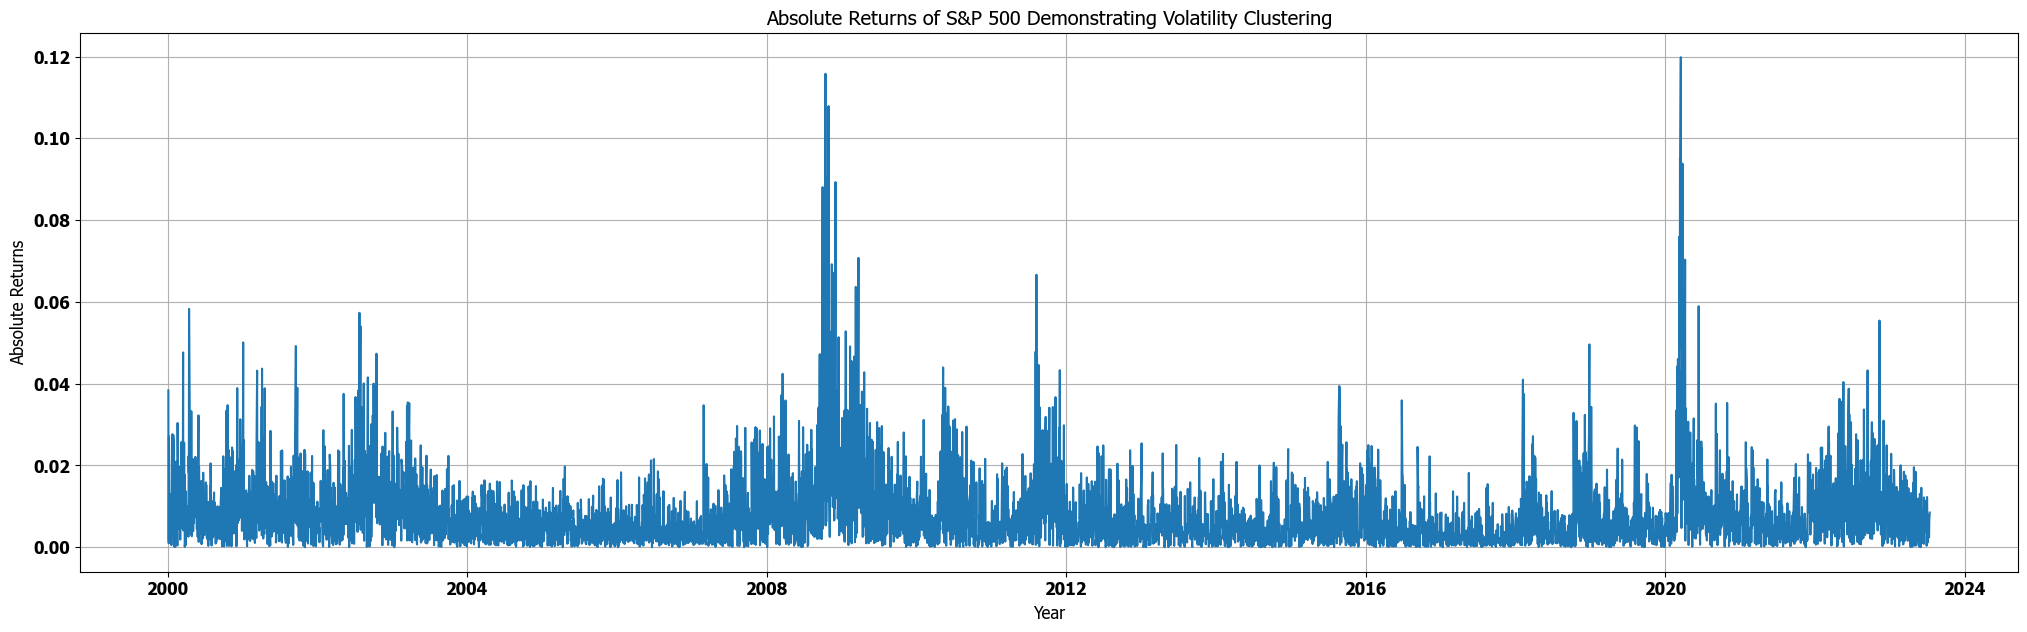

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

# Overriding pandas datareader method
yf.pdr_override()

# Download historical data as dataframe
start_date = "2000-01-01"
end_date = "2023-07-14"

# Get the data
df = pdr.get_data_yahoo("^GSPC", start=start_date, end=end_date)

# Calculate daily returns
df['return'] = df['Close'].pct_change()

# Calculate absolute returns
df['abs_return'] = np.abs(df['return'])

# Drop missing values
df = df.dropna()

# Create the plot

# Set the font used by Matplotlib
font = {'size'   : 12}

plt.rc('font', **font)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.figure(figsize=(25, 7))
plt.plot(df.index, df['abs_return'], label='Absolute Returns')
plt.title('Absolute Returns of S&P 500 Demonstrating Volatility Clustering')
plt.xlabel('Year')
plt.ylabel('Absolute Returns')
plt.grid(True)
plt.show()
